In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input/creditcardfraud/creditcard.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

* ****Data Overview****

1. size of the dataset (rows and columns)

In [3]:
rows, columns = data.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 284807
Number of columns: 31


2. Datatype of each columns

In [4]:
print(data.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


3. Missing values in dataset

In [5]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


* **Class Distribution**

1. How is the target variable (fraudlent or not) distributed?

In [6]:
target_distribution = data['Class'].value_counts()
print("Distribution of the target variable (class):")
print(target_distribution)

Distribution of the target variable (class):
Class
0    284315
1       492
Name: count, dtype: int64


2. What is the percentage of fraudlent transactions in dataset?

In [7]:
# Total number of transactions
total_transactions = len(data)

# Number of fraudulent transactions (assuming '1' represents fraudulent)
fraudulent_transactions = data[data['Class'] == 1].shape[0]

# Calculate the percentage of fraudulent transactions
fraudulent_percentage = (fraudulent_transactions / total_transactions) * 100

print(f'Total transactions: {total_transactions}')
print(f'Fraudulent transactions: {fraudulent_transactions}')
print(f'Percentage of fraudulent transactions: {fraudulent_percentage:.4f}%')


Total transactions: 284807
Fraudulent transactions: 492
Percentage of fraudulent transactions: 0.1727%


3. Are there any class imbalances that needs too be addressed?

In [8]:
class_distribution = data['Class'].value_counts()
print("Class distribution:")
print(class_distribution)

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


Interpretation:
Class 0 (Non-Fraudulent): 284,315 transactions
Class 1 (Fraudulent): 492 transactions

* **Feature Correlations**

1. Calculate and visualise the correlation matrix between features. Are there any strong correlations?

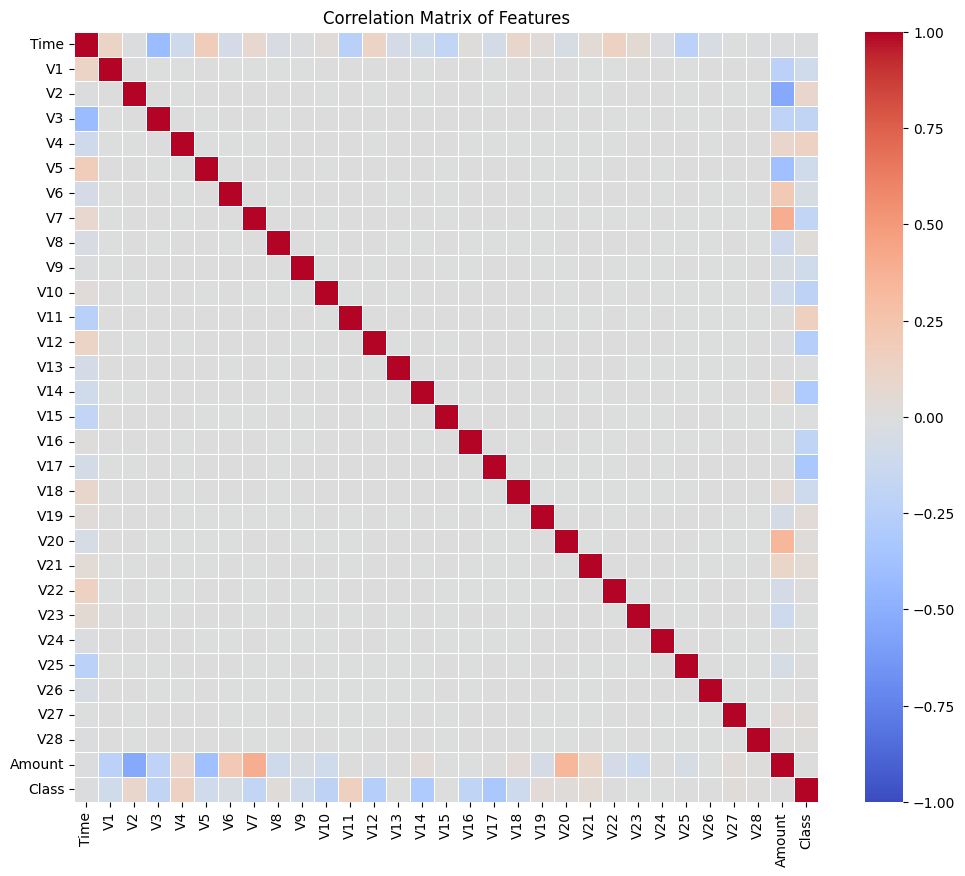

Strong correlations (absolute correlation > 0.8):
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))

# Create a heatmap with seaborn to visualize the correlations
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

strong_correlations = []

# Loop through the upper triangle of the correlation matrix to find strong correlations
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8: 
            strong_correlations.append([correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value])

# Convert the list into a DataFrame for better readability
strong_correlations_df = pd.DataFrame(strong_correlations, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Display the strong correlations
print("Strong correlations (absolute correlation > 0.8):")
print(strong_correlations_df)

2. How do feature correlate with the target variable?

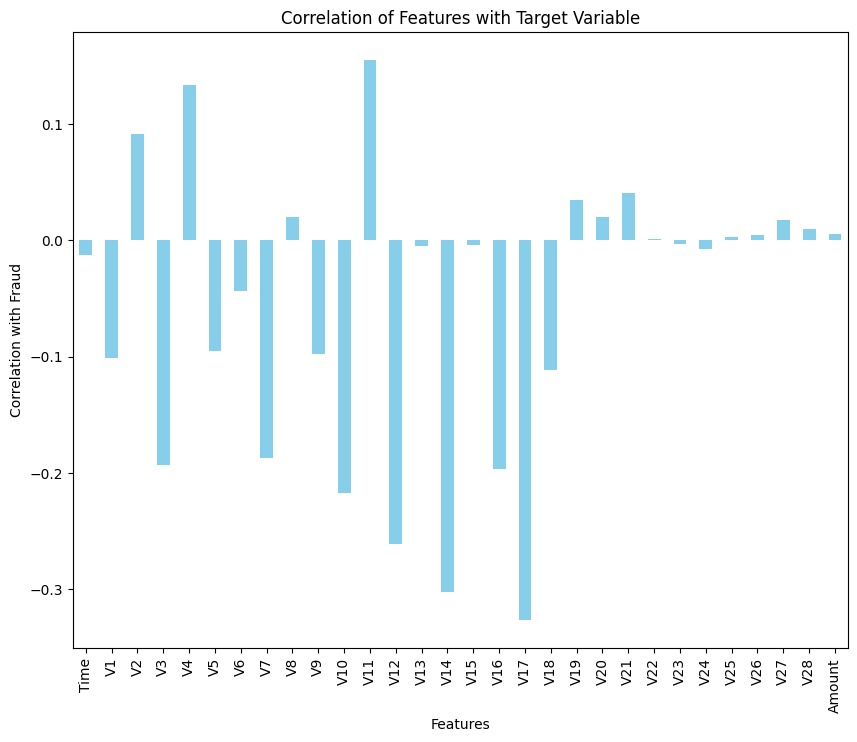

In [10]:
# Calculate correlations between features and the target variable ('Class')
correlation_with_target = data.corr()['Class'].drop('Class')

# Visualize the correlations with a bar plot
plt.figure(figsize=(10, 8))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation with Fraud')
plt.show()

* **Data Preprocessing**

1. Prepare the data for modelling by handling missing values,scaling and encoding categorical variables if necessary.

In [11]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


* **Visualization**

1. Plot the distribution of transaction times for both fraudlent and non-fraudlent transaction.

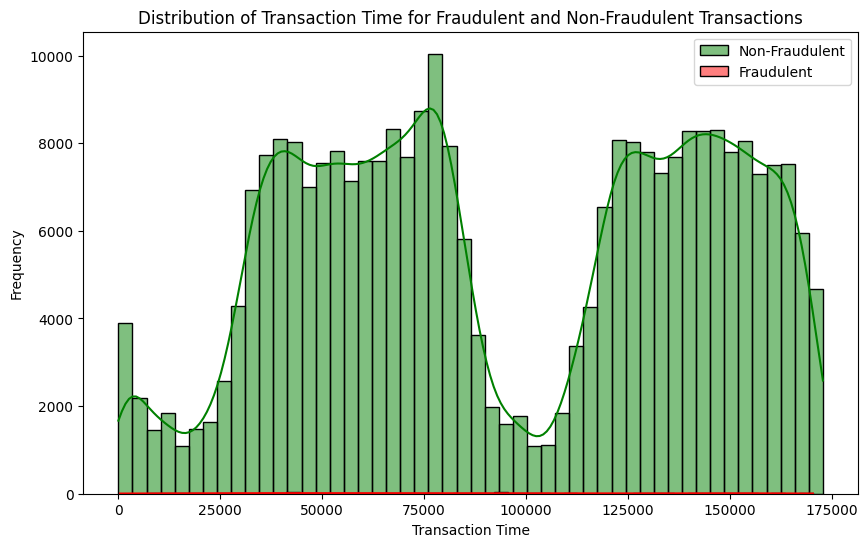

In [12]:
import warnings
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

# Check for infinite values and replace them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Separate the data into fraudulent and non-fraudulent transactions
fraudulent = data[data['Class'] == 1]
non_fraudulent = data[data['Class'] == 0]

plt.figure(figsize=(10, 6))

# Plot for non-fraudulent transactions
sns.histplot(non_fraudulent['Time'], bins=50, color='green', label='Non-Fraudulent', kde=True)

# Plot for fraudulent transactions
sns.histplot(fraudulent['Time'], bins=50, color='red', label='Fraudulent', kde=True)

# Adding labels and title
plt.title('Distribution of Transaction Time for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.legend()

plt.show()

Model used: Random Forest
* Handles imbalanced data effectively.
* Resistant to overfitting.
* Provides feature importance insights.
* Handles large datasets efficiently.
* Works well with both numerical and categorical data.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
X = data.drop(columns=['Class'])  
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9995611109160493
Confusion Matrix:
 [[56863     1]
 [   24    74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.76      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

